In [4]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [5]:
data = pd.read_csv("advertiment_data.csv", index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


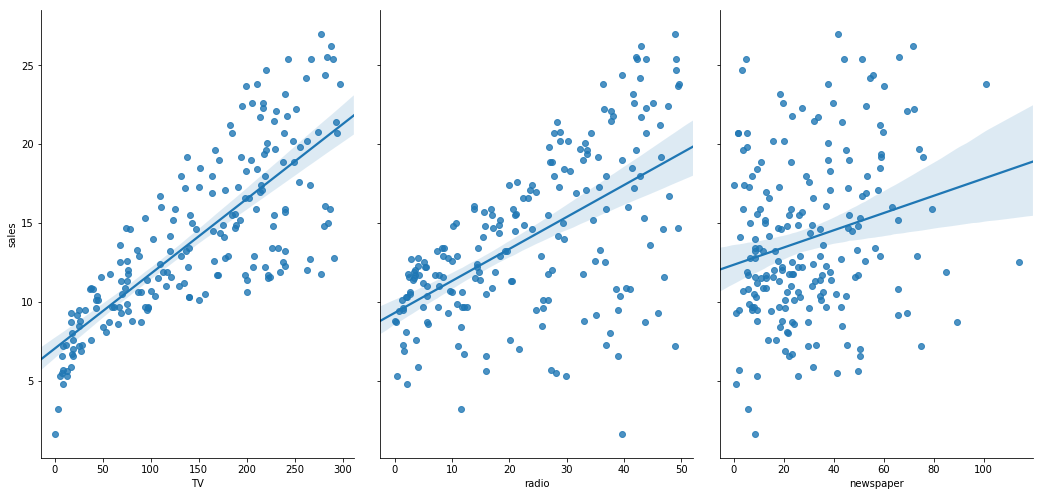

In [6]:
# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph

sns.pairplot(data, x_vars=["TV", "radio", "newspaper"], y_vars="sales", size=7, aspect=0.7, kind = "reg")

Linear regression


Strong relationship between TV ads and sales

Weak relationship between Radio ads and sales

Very weak to no relationship between Newspaper ads and sales

# Form of linear regression
y=β0+β1x1+β2x2+...+βnxn 

y  is the response

β0  is the intercept

β1  is the coefficient for  x1  (the first feature)


βn  is the coefficient for  xn  (the nth feature)
In this case:


y=β0+β1×TV+β2×Radio+β3×Newspaper 

The  β  values are called the model coefficients


These values are "learned" during the model fitting step using the "least squares" criterion

Then, the fitted model can be used to make predictions

# Preparing X and Y using pandas

In [7]:
#create a python list of feature names
feature_cols = ["TV", "radio", "newspaper"]
#use the list to sleect a subset of the original DataFrame
X = data[feature_cols]
y = data['sales']
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [8]:
y.shape

(200,)

# Spliting X and y into training and testing sets

In [9]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(150, 3)
(50, 3)
(50,)
(150,)


# Linear regression in scikit-learn

In [11]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


# Making Prediction 

In [13]:
y_pred = linreg.predict(X_test)
y_pred

array([21.70910292, 16.41055243,  7.60955058, 17.80769552, 18.6146359 ,
       23.83573998, 16.32488681, 13.43225536,  9.17173403, 17.333853  ,
       14.44479482,  9.83511973, 17.18797614, 16.73086831, 15.05529391,
       15.61434433, 12.42541574, 17.17716376, 11.08827566, 18.00537501,
        9.28438889, 12.98458458,  8.79950614, 10.42382499, 11.3846456 ,
       14.98082512,  9.78853268, 19.39643187, 18.18099936, 17.12807566,
       21.54670213, 14.69809481, 16.24641438, 12.32114579, 19.92422501,
       15.32498602, 13.88726522, 10.03162255, 20.93105915,  7.44936831,
        3.64695761,  7.22020178,  5.9962782 , 18.43381853,  8.39408045,
       14.08371047, 15.02195699, 20.35836418, 20.57036347, 19.60636679])

# Model Evaluation metric for regression

In [14]:
#define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

1n∑i=1n|yi−ŷ i|

In [15]:
#calculate MAE by hand
print((10+0+20+10)/4)

#caluculating MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


Mean Squared Error (MSE) is the mean of the squared errors:


1n∑i=1n(yi−ŷ i)2

In [16]:
#calculate MSE by hand
import numpy as np
print((10**2 + 0**2 +20**2+10**2)/4)

#calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


In [17]:
#calculate RMSE by hand
import numpy as np
print(np.sqrt(((10**2 +0**2+20**2+10**2)/4)))

#calculating RMSE using skit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


Comparing these metrics:

MAE is the easiest to understand, because it's the average error.

MSE is more popular than MAE, because MSE "punishes" larger errors.

RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

    Easier to put in context as it's the same units as our response variable

# Computing the RMSE for our Sales predictions

In [18]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328955


# Feature seletion

Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?

In [19]:
feature_cols = ["TV", "radio"]
X = data[feature_cols]

y = data.sales

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328955


The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.